- Aprendizado supervisionado - quando temos um alvo, ou seja, a coluna que queremos fazer a previsão 

- Não supervisionado- passamos um dataset e ele cria grupos(cluster), por exemplo, em um conjunto de imagens de cachorro e gatos, ele cria dois grupos

- aprendizado por reforço - agente aprende com ambiente / experiencia

- varios usos como sistemas de recomendação, detecção de anomalias, previsão de demandas, entre outros

# Algoritmo random forest

algoritmo de regreção ou classificação( 
  
  classificação -> dado categorigo, ou binario

  regreção -> dados continuos)

previsão -> dados continuos

predição -> classificação


1. Bootstrap dataset: tecnica de reamostragem que envolve amostragem aleatoria de um conjunto de dados com substituição
2. Verificação que melhor separa os nossos dados(ex: indice gini(quanto maior maior a homogeneidade, quanto menor mais disperso)) e pegamos o melhor indice gine e cria o no raiz(no caso abaixo seria idade)
3. criaçaõ das arvores
4. a partir da verificação é selecionado o no raiz
5. esse processo é realizado varias vezes ate que sejam criadasd todas as arvores da floresta 

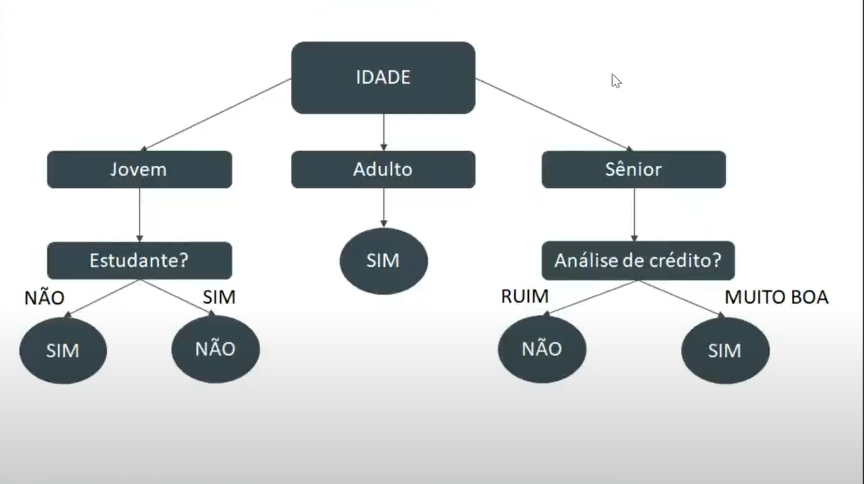

passos
1. precisamos saber se eh um problema de regrssao, classificaçaõ ou clustering
2. se o dataset nao possui variaveis dependentes, seu problema eh de clustering
3. se seu dataset possui variavel dependente, entao eh necessario identificar se é continua ou categorica

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import sklearn.metrics
#from sklearn.metrics import plot_confusion_matrix

# Introdução

primeiras analises sobre o dataset titanic



In [8]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/dataset/titanic.csv')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Taxa de homens e mulheres que sobreviveram ao titanic
mulheres = df[df['Sex'] == 'female']['Survived']
taxa_mulheres = sum(mulheres)/len(mulheres)
taxa_mulheres

0.7420382165605095

Text(0.5, 1.0, 'Gender')

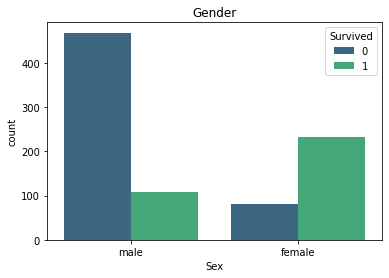

In [18]:
# VImos que genero é uma variavel muito importante a ser analisada
sns.countplot(x='Sex', data=df, hue='Survived', palette='viridis')
plt.title('Gender')

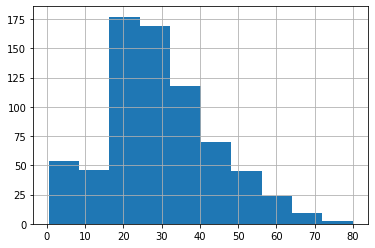

In [20]:
# Vimos que idade tambem é uma variavel mutio importante a ser analisada
df['Age'].hist();

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

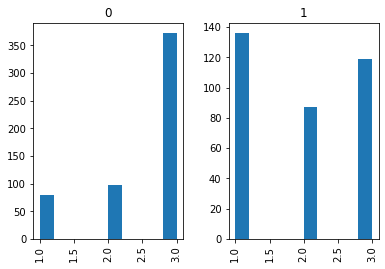

In [19]:
# Vimos que Classe tambem é uma variavel mutio importante a ser analisada
df['Pclass'].hist(by=df['Survived'])

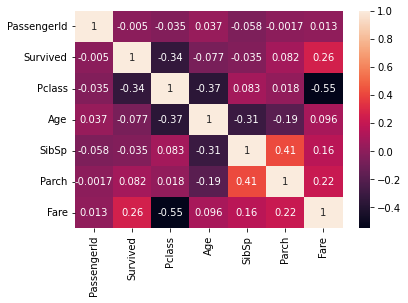

In [21]:
# Analisando as relações entre variaveis com grafico de calor -> se tiverem duas variaveis altamente relacionada, escolhemos uma para treinar nosso modelo
sns.heatmap(df.corr(), annot=True)
plt.show()

# Se tiver uma correlação mt alta entre duas, exluimos uma para nosso teste, pois podem confundir o modelo

# Tirando as variaveis categorias


A maioria dos modelos nao aceitam variaveis caregoricas, entao precisamos mudar a coluna Sex pra numerica

In [22]:
df["Sex"] = df['Sex'].map({'male': 0, 'female': 1},)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [24]:
teste = pd.get_dummies(df) # Tenta tirar as variaveis categoricas
teste

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,1,NaN,1,2,23.4500,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,1,0,0


# Tirando os valores nulos

In [25]:
# Verificando valores nulos-> maioria dos modelos nao aceitam
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
df_treino = df.dropna(subset=['Age'])

In [28]:
df_treino.shape

(714, 12)

# Selecionando as features para o nosso modelo

In [29]:
X = df_treino.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked', 'Cabin'])
y = df_treino['Survived'] # Variavel alvo -> aquela que queremos analisar

In [30]:
X.head() # Subsp -> numero de conjujes parch -> pais ou filhos a bordo

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Dividindo os dados em treinos e teste

In [32]:
# Damos prioridade ao treino, se tivermos pouco voluime 90 10, muito 60 40, normalmente 70 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # eliminar ateatoriedade entre diferentes modelos(queremso testar da msm forma)
# Random state pega a mesma amostra pra varios modelos diferentes

In [33]:
X_train.shape, X_test.shape

((499, 6), (215, 6))

In [34]:
y_train.shape, y_test.shape

((499,), (215,))

# Instanciando o objeto a classificar

In [35]:
decision_tree = DecisionTreeClassifier()

# Treinando nosso modelo

In [36]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Basicamente nos vamos olhar pro X_test e fazer previsoes em relação ao Y test, uma vez que o treino foi analisar as variaveis e colunas do X_train e comparar com o resultado y_train

In [37]:
resultado = decision_tree.predict(X_test)

In [38]:
resultado

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

# Acuracia: previsoes corretas / total de previsoes


In [39]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       126
           1       0.70      0.70      0.70        89

    accuracy                           0.75       215
   macro avg       0.74      0.74      0.74       215
weighted avg       0.75      0.75      0.75       215



# Verificando features mais importantes

In [40]:
decision_tree.feature_importances_

array([0.11504893, 0.32095062, 0.27118651, 0.04300059, 0.01118341,
       0.23862994])

In [41]:
features_importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [42]:
features_importances

Sex       0.320951
Age       0.271187
Fare      0.238630
Pclass    0.115049
SibSp     0.043001
Parch     0.011183
dtype: float64

In [43]:
def visualiza_grafico(features):
    plt.figure(figsize=(16,8))
    sns.barplot(x=features, y=features.index)
    plt.show()

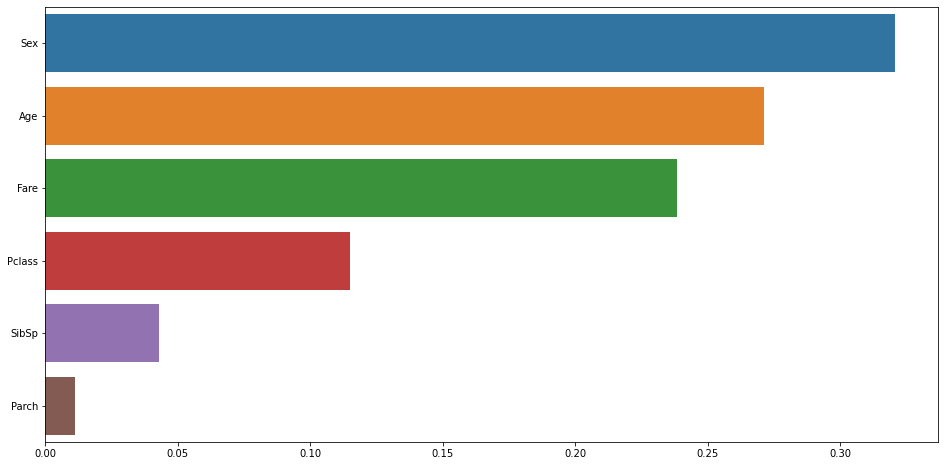

In [44]:
visualiza_grafico(features_importances)

# Random forest

metodo passado pode nao ser geral, funcionando apenas para os dados do teste, pois so usa uma arvore de decisão

In [45]:
#instanciando
rf = RandomForestClassifier()

In [46]:
 # Treinando o modelo
rf.fit(X_train, y_train)

RandomForestClassifier()

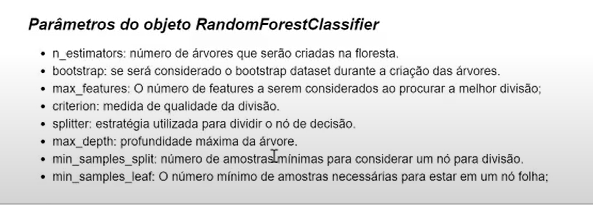

In [47]:
# Verificando resultado
resultado = rf.predict(X_test)

In [48]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       126
           1       0.77      0.72      0.74        89

    accuracy                           0.80       215
   macro avg       0.79      0.78      0.79       215
weighted avg       0.79      0.80      0.79       215



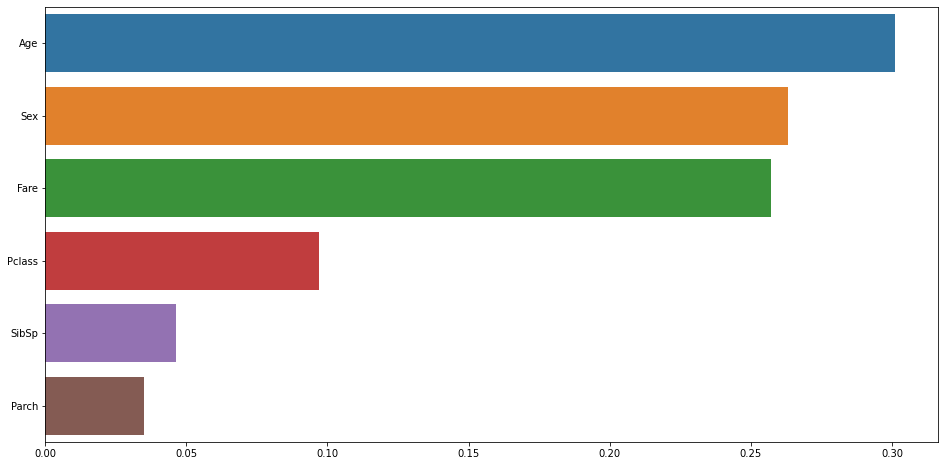

In [49]:
features_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False) # Cria um array de colunas x importancia

visualiza_grafico(features_importances) # Plota esse array de antes

Visualizando arvores de decisão

In [50]:
tree_0 = rf.estimators_[0]

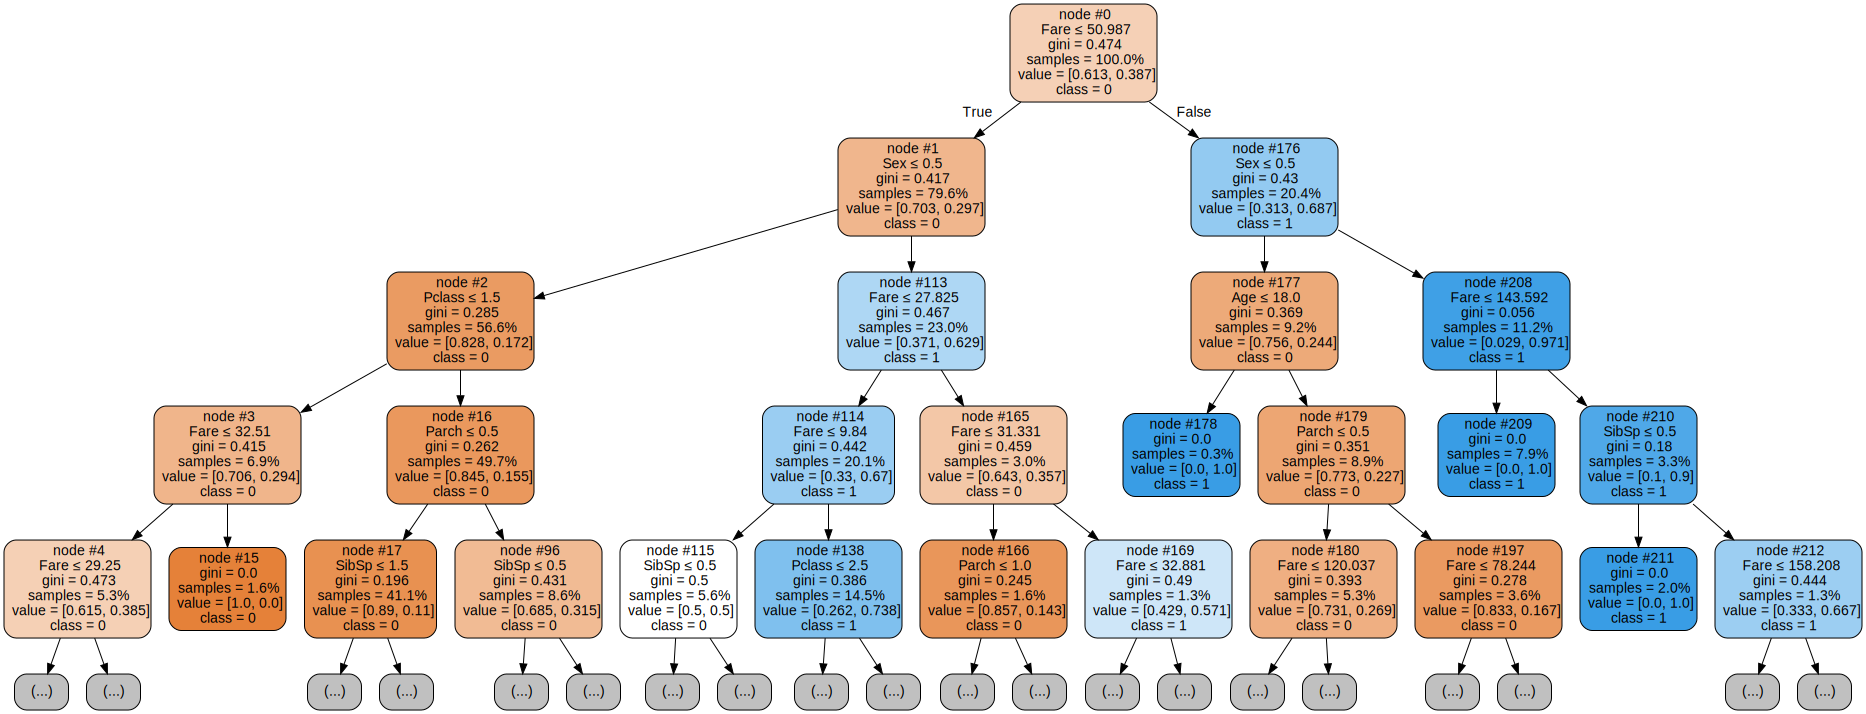

In [51]:
dot_data = export_graphviz(
         tree_0,
         max_depth=4,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
          label='all',
          special_characters=True
          )  
graph = graphviz.Source(dot_data)  
graph

In [52]:
# Testes com dados personalizados
teste = np.array([[2, 0, 19, 1, 0, 18.75]])

In [75]:
rf.predict(teste)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  # no feature names seen in fit and in X


array([0])

# Padronização dos dados

garantir que a media e o desvio padrao sejam 0 e 1, e com isso, os modelos nao tratarão as features com escalas maiores como mais importantes 

isto é, deixando as variaveis na mesma escala, fazendo com que variaveis maiores nao sejam confundidas com mais importantes

In [54]:
cols = X_train.columns

In [55]:
sca = preprocessing.StandardScaler() # instanciando padronizador

In [56]:
# padronizando X_train e X_test
X_train = sca.fit_transform(X_train) # Devolve um array
X_train = pd.DataFrame(X_train, columns=cols)

X_test = sca.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.935746,-0.747914,-0.629186,-0.54619,-0.494954,-0.584752
1,-0.252390,1.337053,-1.706077,0.57541,1.770935,-0.158742
2,0.935746,-0.747914,-0.124394,-0.54619,-0.494954,-0.602502
3,0.935746,-0.747914,1.928428,-0.54619,-0.494954,-0.602052
4,-1.440525,-0.747914,0.649621,-0.54619,-0.494954,-0.088461
...,...,...,...,...,...,...
494,-1.440525,-0.747914,1.053455,0.57541,-0.494954,0.564069
495,-0.252390,-0.747914,-0.359964,-0.54619,-0.494954,-0.477709
496,-1.440525,1.337053,0.716927,-0.54619,-0.494954,2.149713
497,0.935746,-0.747914,0.178481,0.57541,0.637991,-0.314982


Treinando o novo modelo

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
resultado = rf.predict(X_test)
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       126
           1       0.83      0.66      0.74        89

    accuracy                           0.80       215
   macro avg       0.81      0.78      0.79       215
weighted avg       0.81      0.80      0.80       215



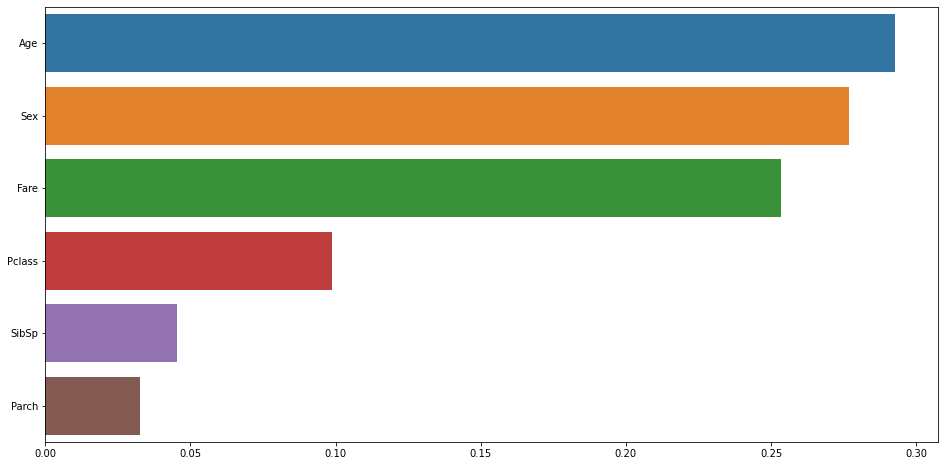

In [59]:
features_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
visualiza_grafico(features_importances)

In [60]:
features_importances

Age       0.292870
Sex       0.276688
Fare      0.253339
Pclass    0.098855
SibSp     0.045511
Parch     0.032738
dtype: float64

# Testando varios modelos
e escolhendo os principais

In [61]:
regression_log = LogisticRegression().fit(X_train, y_train)
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
random_forest = RandomForestClassifier().fit(X_train, y_train)
extra_tree = ExtraTreesClassifier().fit(X_train, y_train)
cat_model = CatBoostClassifier().fit(X_train, y_train)
xgb_boost = XGBClassifier().fit(X_train, y_train)
kn_neighbors = KNeighborsClassifier().fit(X_train, y_train)

Learning rate set to 0.007656
0:	learn: 0.6870726	total: 47.9ms	remaining: 47.8s
1:	learn: 0.6819802	total: 48.8ms	remaining: 24.4s
2:	learn: 0.6769120	total: 49.6ms	remaining: 16.5s
3:	learn: 0.6715994	total: 50.1ms	remaining: 12.5s
4:	learn: 0.6663801	total: 51.1ms	remaining: 10.2s
5:	learn: 0.6623806	total: 51.7ms	remaining: 8.57s
6:	learn: 0.6572822	total: 52.9ms	remaining: 7.5s
7:	learn: 0.6535950	total: 53.8ms	remaining: 6.67s
8:	learn: 0.6492249	total: 54.9ms	remaining: 6.05s
9:	learn: 0.6449964	total: 56ms	remaining: 5.54s
10:	learn: 0.6404868	total: 57ms	remaining: 5.13s
11:	learn: 0.6368075	total: 57.9ms	remaining: 4.76s
12:	learn: 0.6328332	total: 58.9ms	remaining: 4.47s
13:	learn: 0.6280577	total: 59.8ms	remaining: 4.21s
14:	learn: 0.6236674	total: 60.8ms	remaining: 3.99s
15:	learn: 0.6211418	total: 61.5ms	remaining: 3.78s
16:	learn: 0.6173355	total: 62.5ms	remaining: 3.62s
17:	learn: 0.6139934	total: 63.4ms	remaining: 3.46s
18:	learn: 0.6091974	total: 64.4ms	remaining: 3.3

In [62]:
# Função que vai avaliar as metricas de cada modelo, baseado nos testes e modelo que enviaremos a ela
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score
def evaluate_classification_model(model,X_test,y_test):
    pred = model.predict(X_test)
    print("Accuarcy Score : ",accuracy_score(y_test,pred))
    print("Auc score : ",roc_auc_score(y_test,pred))
    print("Recall Score : ",recall_score(y_test,pred, average="binary"))
    print("Precision Score : ",precision_score(y_test,pred))
    print("F1 Score : ",f1_score(y_test,pred))

- regression_log
- decision_tree 
- random_forest
- extra_tree 
- cat_model 
- xgb_boost
- kn_neighbors 

# Testando o Logistic regression

In [63]:
evaluate_classification_model(regression_log, X_test, y_test)

Accuarcy Score :  0.7674418604651163
Auc score :  0.750445871232388
Recall Score :  0.651685393258427
Precision Score :  0.7532467532467533
F1 Score :  0.6987951807228916


- Matrix de confusão
- 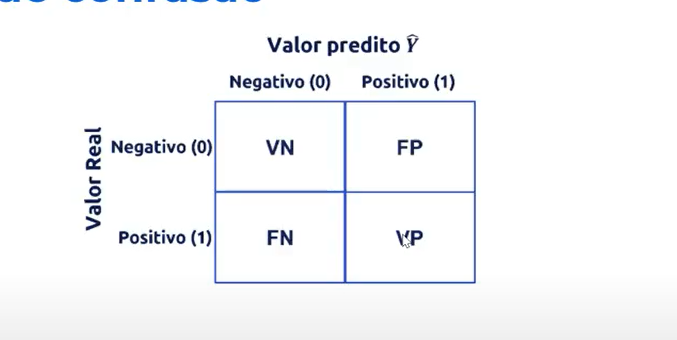

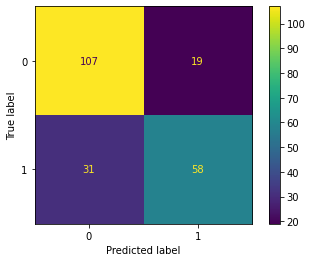

In [76]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(regression_log, X_test, y_test)

# A soma dos que tao em cima sao os que morreram, de cima direita sao os que o algoritmo acertou, e da direita que errou
# Das 116 pessoas que morreram, 107 foram verdadeiramente negativos, e 19 falso positivos
# E das 89 que sobreviveram, 31 foram falsos negativos, e 58 verdadeiramente negativos

In [77]:
len(y_test)


215

In [78]:
y_test.sum()

89

# Testando decision tree

In [79]:
evaluate_classification_model(decision_tree, X_test, y_test)

Accuarcy Score :  0.7488372093023256
Auc score :  0.737872302479044
Recall Score :  0.6741573033707865
Precision Score :  0.7058823529411765
F1 Score :  0.6896551724137931


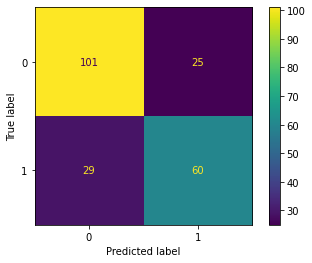

In [80]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)

# Random forest

In [81]:
evaluate_classification_model(random_forest, X_test, y_test)

Accuarcy Score :  0.7953488372093023
Auc score :  0.77095594792224
Recall Score :  0.6292134831460674
Precision Score :  0.835820895522388
F1 Score :  0.717948717948718


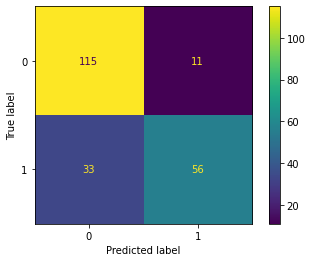

In [74]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)


# extra tree

In [82]:
evaluate_classification_model(extra_tree, X_test, y_test)

Accuarcy Score :  0.7953488372093023
Auc score :  0.7726056714820759
Recall Score :  0.6404494382022472
Precision Score :  0.8260869565217391
F1 Score :  0.7215189873417721


# XG boost

Cria uma arvore fraco e entao melhora as arvores subsequentes a fim de reduzir os erros residuais, ele tenta recuperar e tratar qualquer padrao nos erros, ate que esses erros fiquem aleatorios

In [83]:
evaluate_classification_model(xgb_boost, X_test, y_test)

Accuarcy Score :  0.813953488372093
Auc score :  0.7917781344747638
Recall Score :  0.6629213483146067
Precision Score :  0.855072463768116
F1 Score :  0.7468354430379747


# CatBoost

Basicamente a mesma coisa do XG mas mais otimizado

In [84]:
evaluate_classification_model(cat_model, X_test, y_test)

Accuarcy Score :  0.7906976744186046
Auc score :  0.7702871410736579
Recall Score :  0.651685393258427
Precision Score :  0.8055555555555556
F1 Score :  0.7204968944099379


# KNN

In [85]:
evaluate_classification_model(kn_neighbors, X_test, y_test)

Accuarcy Score :  0.7906976744186046
Auc score :  0.7735865881933297
Recall Score :  0.6741573033707865
Precision Score :  0.7894736842105263
F1 Score :  0.7272727272727273


Funcionamento do knn -> fazemos a distancia carteasiano entre as variaveis que queremos fazer uma previsao e as mesmas variavez do nosso dataset, e fazermos uma analise dos K vizinhos com a menor distancia, e vemos qual valor é nossa variavel Y dos valores analisados e pegamos a maioria

# Metricas de classificação: 

- **acuracia**: previsoes corretas / total de previsoes
- **precição**: VP / (VP + FP) -> dos positivos, quem sao realmente positivos
- **recall**: VP / (VP + FN) -> da maior enfase aos falsos negativos
- **F1**: 2 * ((precisão * recall) / (precisão + recall)) -> media harmonica entre precição e recall(costuma ser o mais usado nos modelos)
- 

# Otimizando o modelo

os hiperparametros controlam o comportamento do modelo, e ao variar esses parametros alteramos o desenpenho do modelo

[texto do link](https:// [texto do link](https://))- Faremos uma validação cruzada, que consistem em para cada fold(parte dos dados), treina-lo e testa-lo com os restantes, e por fim pega-se o melhor resultado

> Bloco com recuo


- 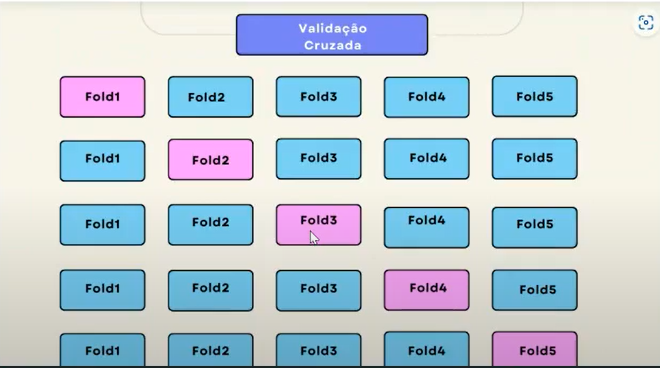

In [87]:
# Criamos um dicionario com todos parametros que queremos testar

# Vai fazer um teste para cada parametreo, ex: faz a validação com o numero de arvores = 200 e depth = 5, ...
param_grid = {
    'n_estimators': [200, 500], # Total de arvores que ele vai criar(testa com 200 e 500 arvores)
    'max_features': ["auto", "sqrt", 'log2'], 
    'max_depth': [4,5,6,7,8], # Profundiade das arvores(testa com essas na lista)
    'criterion': ['gini', 'entropy'] # criterio
    }

In [89]:
cv_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5 ) # CV = folds
cv_rf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  "len(estimators_)=%d when warm_start==True"
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  "len(estimators_)=%d when warm_start==True"
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [90]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [91]:
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=8, criterion='entropy')

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [95]:
resultado = rfc.predict(X_test)

In [99]:
evaluate_classification_model(rfc, X_test, y_test)

Accuarcy Score :  0.827906976744186
Auc score :  0.8036828963795256
Recall Score :  0.6629213483146067
Precision Score :  0.8939393939393939
F1 Score :  0.7612903225806451


# Salvando o modelo

colocando um modelo em produção, usaremos joblib

In [100]:
import joblib

In [104]:
joblib.dump(rfc, "/content/drive/MyDrive/machine learning/Random_forest_final.pkl")

['/content/drive/MyDrive/machine learning/Random_forest_final.pkl']

# Carregando modelo

In [105]:
rfc_from_joblib = joblib.load('/content/drive/MyDrive/machine learning/Random_forest_final.pkl')